In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [3]:
file_path = '/Users/jinshengxiang/Downloads/Pose Estimation RA/blazepose_3D.csv'
data = pd.read_csv(file_path)

In [4]:
def acceleration (dfx,dfy,move_num):
    x = list(eval(dfx[move_num]))
    y = list(eval(dfy[move_num]))
    x = np.asarray(x)
    y = np.asarray(y)
    vx = np.diff(x)
    ax = np.diff(vx)
    vy = np.diff(y)
    ay = np.diff(vy)
    ay2 = np.square(ay)
    ax2 = np.square(ax)
    axy2 = ax2+ay2
    axy = np.sqrt(axy2)
    return axy

In [5]:
def feature_array(move_num):
    dfx_list = ['xX_left_shoulder','xX_right_shoulder','xX_left_elbow',
           'xX_right_elbow','xX_left_wrist','xX_right_wrist', 'xX_left_hip'
           ,'xX_right_hip','xX_left_knee','xX_right_knee','xX_left_ankle',
           'xX_right_ankle']
    dfy_list = ['yY_left_shoulder','yY_right_shoulder','yY_left_elbow',
           'yY_right_elbow','yY_left_wrist','yY_right_wrist', 'yY_left_hip'
           ,'yY_right_hip','yY_left_knee','yY_right_knee','yY_left_ankle',
           'yY_right_ankle']
    joints = ['left_shoulder','right_shoulder','left_elbow',
           'right_elbow','left_wrist','right_wrist', 'left_hip'
           ,'right_hip','left_knee','right_knee','left_ankle',
           'right_ankle']
    axy_list = []
    for joints_index in range(0,len(dfx_list)):
        dfx = data[dfx_list[joints_index]]
        dfy = data[dfy_list[joints_index]]
        axy = acceleration (dfx,dfy,move_num)
        axy_list.append(axy)
    array = np.vstack((axy_list[0],axy_list[1]))
    array = np.vstack((array,axy_list[2]))
    array = np.vstack((array,axy_list[3]))
    array = np.vstack((array,axy_list[4]))
    array = np.vstack((array,axy_list[5]))
    array = np.vstack((array,axy_list[6]))
    array = np.vstack((array,axy_list[7]))
    array = np.vstack((array,axy_list[8]))
    array = np.vstack((array,axy_list[9]))
    array = np.vstack((array,axy_list[10]))
    array = np.vstack((array,axy_list[11]))
    return array

In [50]:
def feature_map(move_num,save_path):
    dfx_list = ['xX_left_shoulder','xX_right_shoulder','xX_left_elbow',
           'xX_right_elbow','xX_left_wrist','xX_right_wrist', 'xX_left_hip'
           ,'xX_right_hip','xX_left_knee','xX_right_knee','xX_left_ankle',
           'xX_right_ankle']
    dfy_list = ['yY_left_shoulder','yY_right_shoulder','yY_left_elbow',
           'yY_right_elbow','yY_left_wrist','yY_right_wrist', 'yY_left_hip'
           ,'yY_right_hip','yY_left_knee','yY_right_knee','yY_left_ankle',
           'yY_right_ankle']
    joints = ['left_shoulder','right_shoulder','left_elbow',
           'right_elbow','left_wrist','right_wrist', 'left_hip'
           ,'right_hip','left_knee','right_knee','left_ankle',
           'right_ankle']
    axy_list = []
    for joints_index in range(0,len(dfx_list)):
        dfx = data[dfx_list[joints_index]]
        dfy = data[dfy_list[joints_index]]
        axy = acceleration (dfx,dfy,move_num)
        axy_list.append(axy)
    array = np.vstack((axy_list[0],axy_list[1]))
    array = np.vstack((array,axy_list[2]))
    array = np.vstack((array,axy_list[3]))
    array = np.vstack((array,axy_list[4]))
    array = np.vstack((array,axy_list[5]))
    array = np.vstack((array,axy_list[6]))
    array = np.vstack((array,axy_list[7]))
    array = np.vstack((array,axy_list[8]))
    array = np.vstack((array,axy_list[9]))
    array = np.vstack((array,axy_list[10]))
    array = np.vstack((array,axy_list[11]))
    plt.imshow(array,interpolation='nearest',aspect='auto')
    #plt.show()
    save_name = data['name'][move_num]
    save_feature_path = os.path.join(save_path,save_name)
    x_pos = 0
    y_pos = -1
    
    plt.text(x_pos,y_pos,data['name'][move_num])
    x_position = -20
    y_position = 0
    for joint in joints :
        plt.text(x_position,y_position,joint,fontsize=6)
        y_position= y_position+1
    plt.savefig(save_feature_path)
    plt.close()
    print(data['name'][move_num]+' complete......')

In [51]:
feature_map(8,'/Users/jinshengxiang/Desktop')

twisting hip raise complete......


In [52]:
save_path = '/Users/jinshengxiang/Downloads/Pose Estimation RA/feature_map_out'
for move_num in range(0,data.shape[0]):
    feature_map(move_num,save_path)

incline bench sit-ups complete......
hanging leg raises complete......
dumbbell side bends complete......
crunches complete......
sit-ups complete......
leg raises complete......
flat bench lying leg raise complete......
seated jackknife complete......
twisting hip raise complete......
bodyweight crunch complete......
russian twist complete......
slide bridge complete......
chin-ups complete......
deadlifts complete......
lat pull-downs complete......
seated rows complete......
one-arm dumbbell rows complete......
brbell shrugs complete......
dumbbell shrugs complete......
back extensions complete......
bent over row complete......
reverse chin ups complete......
curls complete......
barbell curls complete......
preacher curls complete......
hummer curls complete......
concentration curls complete......
reverse curls complete......
cable biceps curl complete......
low pulley curls complete......
low pulley cable crossover complete......
toe raises complete......
one-leg toe raises comp

In [5]:
# feature clustering 


In [6]:
move1 = feature_array(1)

In [7]:
move1.shape[1]

282

In [15]:
data.shape

(149, 50)

In [17]:
# min_frame_num
frame_num_list = []
for move in range(0,data.shape[0]):
    frame_num = feature_array(move).shape[1]
    frame_num_list.append(frame_num)

In [20]:
min(frame_num_list)

97

In [9]:
# use pca dimension deduction:

from sklearn.decomposition import PCA
import cv2 as cv
import numpy as np

In [13]:
move1 = feature_array(1)
move1.shape

(12, 282)

In [17]:
move1 = np.transpose(move1)
move1[0]

array([0.00291103, 0.00259795, 0.002932  , 0.0029915 , 0.00148325,
       0.00162216, 0.00473993, 0.00431712, 0.00031503, 0.00343023,
       0.00236794, 0.00232214, 0.00445162, 0.00407278, 0.00222368,
       0.00689597, 0.00290749, 0.0052795 , 0.00575974, 0.00482945,
       0.00373133, 0.00786034, 0.00486706, 0.00443228, 0.00529937,
       0.00924322, 0.00333467, 0.00232153, 0.00287427, 0.00359366,
       0.00227492, 0.00443144, 0.01063487, 0.00550848, 0.00777381,
       0.01117486, 0.00557872, 0.00650029, 0.00216201, 0.00553614,
       0.00301877, 0.00391103, 0.00545782, 0.00171443, 0.00362029,
       0.00377302, 0.00912535, 0.0093036 , 0.00536703, 0.00682534,
       0.00304109, 0.00201412, 0.00250108, 0.00113071, 0.00140197,
       0.00226683, 0.00224386, 0.00151998, 0.00787824, 0.00788412,
       0.00100958, 0.00233929, 0.00711167, 0.00573605, 0.00108503,
       0.00318073, 0.00422105, 0.00170571, 0.00290429, 0.00367336,
       0.00490429, 0.0061092 , 0.00573872, 0.00511835, 0.00666

In [18]:
pca = PCA(n_components=100)
newArray = pca.fit_transform(move1)
print(pca.explained_variance_ratio_)

ValueError: n_components=100 must be between 0 and min(n_samples, n_features)=12 with svd_solver='full'

In [35]:
newArray.flatten()

array([-0.28109043, -0.04050543, -0.01806057, -0.26712149, -0.03424878,
       -0.01291565, -0.25825136, -0.03535687, -0.02235779, -0.23798622,
       -0.02428988, -0.01979503, -0.24969648, -0.03813764, -0.01341541,
       -0.23377012, -0.0263153 , -0.0219062 , -0.16952833, -0.00543794,
       -0.03139393, -0.17991653, -0.02364933, -0.0158874 ,  0.18251692,
        0.12670534,  0.123253  ,  0.40282129, -0.0445922 ,  0.2990759 ,
        0.45072509,  0.471475  , -0.11689127,  0.84129766, -0.32564697,
       -0.14970564])

In [19]:
all_flatten_image = []
for move in range(0,data.shape[0]):
    movearray = feature_array(move)
    pca = PCA(n_components=10)
    newArray = pca.fit_transform(movearray)
    new_flattenArray = newArray.flatten()
    all_flatten_image.append(new_flattenArray)


In [20]:
 all_flatten_image

[array([ 3.48444547e+00, -6.88926023e-01, -2.29613938e-01, -4.07750349e-01,
        -8.00353657e-02, -1.54877556e-01, -4.54199904e-02, -3.42808756e-02,
        -1.19523268e-01, -6.34262900e-02,  3.10136288e+00, -5.45058976e-01,
        -2.08431467e-01, -3.89240105e-01, -1.82917960e-01, -8.94310939e-02,
        -3.84385748e-02,  4.19867428e-02,  1.31012338e-01,  7.41558259e-02,
         2.77583947e+00, -2.57627790e-01, -1.64411236e-01,  2.24284994e-01,
         7.66154422e-02,  3.03589209e-01,  9.73375879e-02, -2.11634415e-01,
         1.77355850e-02, -5.28859360e-03,  1.63981339e+00,  6.44090688e-01,
         2.51628512e-01, -1.98309890e-01, -1.10731463e-01,  2.57070189e-01,
         7.50691570e-02,  2.38059032e-01, -3.10487977e-02, -1.43187880e-02,
         2.64521801e+00,  4.27214365e-02, -2.73019758e-01,  8.85838590e-01,
         3.26410179e-01, -1.37927128e-01, -4.34085822e-02,  9.99867046e-02,
        -3.10428531e-03,  7.96461543e-03,  1.10095994e+00,  1.71186636e+00,
         8.1

In [21]:
image_matrx = np.array(all_flatten_image)

In [22]:
image_matrx.shape

(149, 120)

In [23]:
from sklearn.cluster import KMeans

In [55]:
seed = 9  # 设置随机数
clf = KMeans(n_clusters=40, random_state=seed)  # 聚类
clf.fit(image_matrx)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=40, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=9, tol=0.0001, verbose=0)

In [56]:
label_ = clf.labels_

In [57]:
label_

array([ 2,  9,  1,  1, 12,  1, 30,  5,  8,  1,  1,  1,  1,  1,  7, 13, 18,
        1,  1, 11,  1, 10,  1,  1, 29,  1,  1, 29,  1, 22,  1,  1,  1, 21,
       35, 12, 25, 39,  1, 20,  1,  1,  0,  4,  6, 18,  1, 16,  1,  9,  3,
        1,  1,  1, 29,  1,  1,  1,  1,  1,  1, 17,  1,  1,  1,  1, 15,  8,
       31,  1,  1, 38,  1, 37,  1, 22,  1,  1,  1, 14, 24, 24,  1,  1, 19,
       34,  1,  1,  1,  1,  1,  1,  1, 33, 36,  1, 27, 39,  1, 32,  1,  1,
       22,  1,  1, 28,  1, 29,  1, 39,  1, 24,  1,  1,  1,  1,  1,  1,  1,
        1,  1, 29, 26, 34,  1, 22,  1,  1,  1, 29,  1,  1,  1, 29,  1,  1,
       29,  1,  1,  1,  1, 23, 28,  1,  1, 29,  1,  1, 29], dtype=int32)

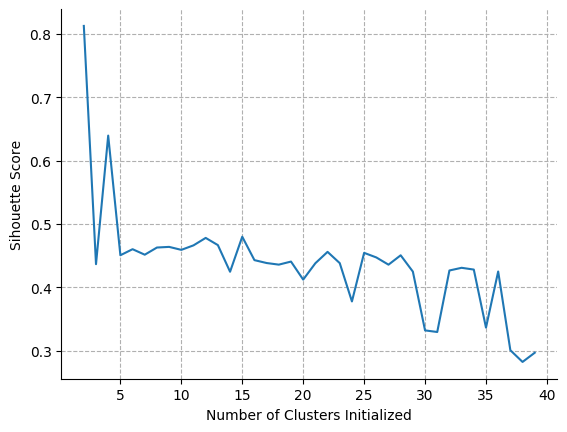

In [29]:
from sklearn import metrics
import seaborn as sns
scores = []
for k in range(2,40):
    labels = KMeans(n_clusters=k).fit(image_matrx).labels_
    score = metrics.silhouette_score(image_matrx, labels)
    scores.append(score)

plt.plot(list(range(2,40)),scores)
#plt.xticks(range(0,40,1)) 
plt.grid(linestyle='--')
plt.xlabel("Number of Clusters Initialized")
plt.ylabel("Sihouette Score")
sns.despine()
plt.show()

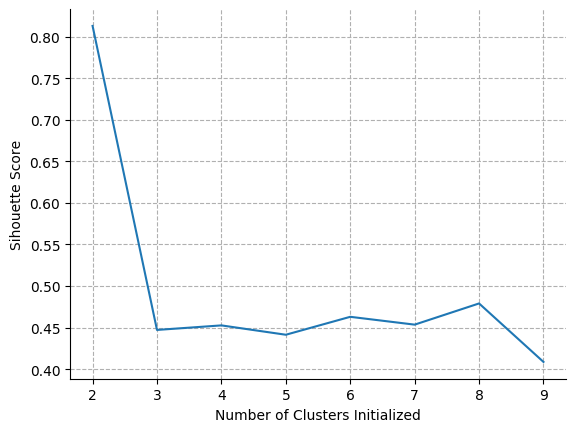

In [31]:
from sklearn import metrics
import seaborn as sns
scores = []
for k in range(2,10):
    labels = KMeans(n_clusters=k).fit(image_matrx).labels_
    score = metrics.silhouette_score(image_matrx, labels)
    scores.append(score)

plt.plot(list(range(2,10)),scores)
#plt.xticks(range(0,40,1)) 
plt.grid(linestyle='--')
plt.xlabel("Number of Clusters Initialized")
plt.ylabel("Sihouette Score")
sns.despine()
plt.show()

In [35]:
# take k =2 
labels = KMeans(n_clusters=4).fit(image_matrx).labels_

In [36]:
list(labels)

[2,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 3,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0]

In [37]:
data['label'] = list(labels)

In [41]:
data[(data.label == 1)]

,name,xX_left_shoulder,yY_left_shoulder,zZ_left_shoulder,xX_right_shoulder,yY_right_shoulder,zZ_right_shoulder,xX_left_elbow,yY_left_elbow,zZ_left_elbow,...,left_hip__left_ankle,right_hip__right_ankle,right_wrist__right_shoulder,right_knee__left_knee,right_ankle__left_ankle,right_wrist__right_ankle,left_wrist__left_ankle,right_wrist__right_knee,left_wrist__left_knee,label
1,hanging leg raises,"[0.5771689414978027, 0.5776169300079346, 0.575...","[0.31063947081565857, 0.30978500843048096, 0.3...","[-0.2686699628829956, -0.24024717509746552, -0...","[0.39680927991867065, 0.3955231308937073, 0.39...","[0.3135151267051697, 0.3139392137527466, 0.315...","[0.1099938154220581, 0.12704625725746155, 0.12...","[0.6183392405509949, 0.615531861782074, 0.6158...","[0.2082386612892151, 0.2102893888950348, 0.212...","[-0.5655490756034851, -0.5503409504890442, -0....",...,"[0.38312341851700094, 0.40073193740800783, 0.4...","[0.3736209962954917, 0.38553048508032434, 0.40...","[0.3916405906682, 0.4164840358052838, 0.408675...","[0.23628123970018053, 0.234004291077639, 0.241...","[0.2738187037643674, 0.2580223504008175, 0.234...","[0.9257026983525132, 0.9452278303511191, 0.956...","[1.1253629871840585, 1.1521088022413202, 1.205...","[0.6603932020011974, 0.6723258499462793, 0.678...","[0.8660242176510692, 0.8778438731895666, 0.902...",1
6,flat bench lying leg raise,"[0.5050132870674133, 0.501267671585083, 0.5127...","[0.6642133593559265, 0.654516875743866, 0.6320...","[-0.2828580439090729, -0.26664745807647705, -0...","[0.4744139015674591, 0.46810778975486755, 0.46...","[0.5856512784957886, 0.5966489315032959, 0.587...","[-0.2515294551849365, -0.22451138496398926, -0...","[0.47615212202072144, 0.47960126399993896, 0.4...","[0.7317160964012146, 0.674159049987793, 0.6689...","[-0.3557495176792145, -0.32076022028923035, -0...",...,"[0.4325254758513455, 0.39363453839504975, 0.41...","[0.44054092412501966, 0.40934120629139753, 0.4...","[0.17013923766394404, 0.14984365987152712, 0.1...","[0.035397767294187726, 0.05162039014434665, 0....","[0.029581769103123292, 0.04808214702949945, 0....","[0.8474982495292692, 0.784051833749519, 0.8097...","[0.8834971715392802, 0.7868823878617633, 0.822...","[0.6287969773625339, 0.5806959886318156, 0.596...","[0.661420880435746, 0.5824064966692126, 0.6138...",1
7,seated jackknife,"[0.6404452323913574, 0.64142906665802, 0.64115...","[0.3681546747684479, 0.3699181079864502, 0.369...","[-0.09228122234344482, -0.08316387981176376, -...","[0.6005973219871521, 0.5993955731391907, 0.598...","[0.3702160716056824, 0.3711894750595093, 0.370...","[0.25648605823516846, 0.2756410837173462, 0.29...","[0.6669987440109253, 0.6681661605834961, 0.668...","[0.5170937776565552, 0.5174422860145569, 0.518...","[-0.2002740353345871, -0.20197048783302307, -0...",...,"[0.2901700623539933, 0.2909545929398325, 0.295...","[0.27562409758034595, 0.27549271709596523, 0.2...","[0.2043405221836338, 0.20848572069501484, 0.20...","[0.19762659878359792, 0.2045235600734245, 0.21...","[0.22506300569214238, 0.23195411187597964, 0.2...","[0.4216680299598794, 0.43588970569271984, 0.45...","[0.3777916309018992, 0.3765862215904394, 0.369...","[0.34662999587531, 0.3652167224732052, 0.38197...","[0.2712854253337425, 0.2704056393618975, 0.263...",1
36,dumbbell presses,"[0.44539403915405273, 0.44789642095565796, 0.4...","[0.4793948531150818, 0.48254498839378357, 0.47...","[-0.11354456096887589, -0.1022496223449707, -0...","[0.5249506831169128, 0.5254260301589966, 0.524...","[0.4768444299697876, 0.4774240255355835, 0.474...","[-0.4068882167339325, -0.3852698504924774, -0....","[0.4179598093032837, 0.4197717607021332, 0.419...","[0.3439841568470001, 0.34976208209991455, 0.34...","[-0.060048654675483704, -0.04905278980731964, ...",...,"[0.3875032564319962, 0.3710985431620515, 0.463...","[0.2611153129869276, 0.25463843450328333, 0.26...","[0.3566088016734845, 0.36421216688379887, 0.36...","[0.41556923697948783, 0.3956656002331421, 0.37...","[0.6485914377112949, 0.635014

In [42]:
data.to_csv('/Users/jinshengxiang/Desktop/PCA10K4.csv')

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import manifold, datasets

In [59]:
# TSNE

all_flatten_image = []
for move in range(0,data.shape[0]):
    movearray = feature_array(move)
    tsne = manifold.TSNE(n_components=10, init='pca', random_state=501,method='exact')
    newArray = X_tsne = tsne.fit_transform(movearray)
    new_flattenArray = newArray.flatten()
    all_flatten_image.append(new_flattenArray)

In [65]:
image_matrx1 = np.array(all_flatten_image)

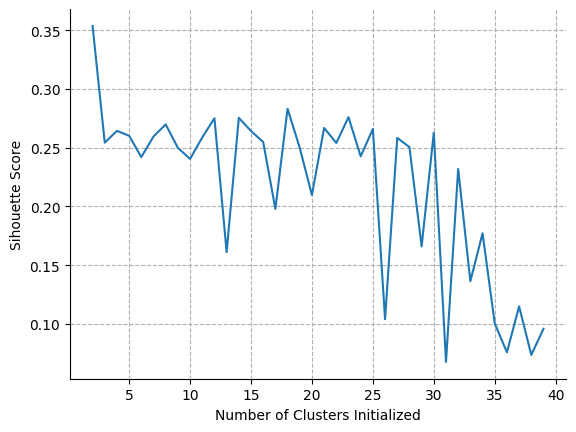

In [67]:
from sklearn import metrics
import seaborn as sns
scores = []
for k in range(2,40):
    labels = KMeans(n_clusters=k).fit(image_matrx1).labels_
    score = metrics.silhouette_score(image_matrx1, labels)
    scores.append(score)

plt.plot(list(range(2,40)),scores)
#plt.xticks(range(0,40,1)) 
plt.grid(linestyle='--')
plt.xlabel("Number of Clusters Initialized")
plt.ylabel("Sihouette Score")
sns.despine()
plt.show()

In [72]:
# take k =4
labels = KMeans(n_clusters=3).fit(image_matrx1).labels_

In [73]:
labels

array([2, 0, 2, 2, 1, 2, 0, 0, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 0, 0, 2, 0, 2, 2, 0, 2,
       2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 1, 1, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 1, 2, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 1, 2, 0,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 2, 1, 2, 2, 2, 1, 2, 2,
       2, 1, 2, 2, 1, 2, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 1], dtype=int32)

In [74]:
data['label'] = labels

In [76]:
data.to_csv('/Users/jinshengxiang/Desktop/CLUSTER/Tsne10K3.csv')

In [84]:
# umap
import umap.umap_ as umap
embedding = umap.UMAP(n_components=3, 
                      n_neighbors=5,
                      min_dist=0.3,
                      metric='correlation').fit_transform(move1)

In [88]:
all_flatten_image = []
for move in range(0,data.shape[0]):
    movearray = feature_array(move)
    model =  umap.UMAP(n_components=3, 
                      n_neighbors=5,
                      min_dist=0.3,
                      metric='correlation')
    newArray = model.fit_transform(movearray)
    new_flattenArray = newArray.flatten()
    all_flatten_image.append(new_flattenArray)

In [90]:
image_matrx2 = np.array(all_flatten_image)

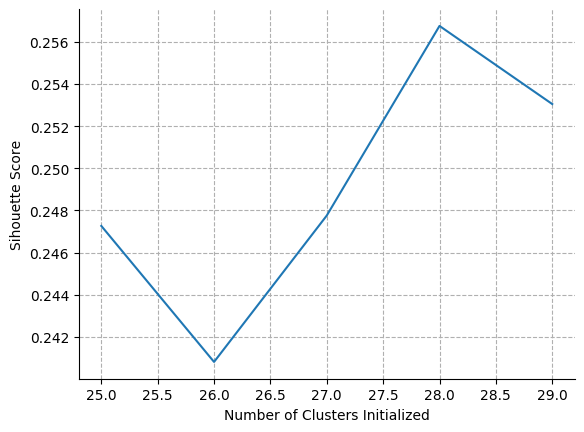

In [94]:
from sklearn import metrics
import seaborn as sns
scores = []
for k in range(25,30):
    labels = KMeans(n_clusters=k).fit(image_matrx2).labels_
    score = metrics.silhouette_score(image_matrx2, labels)
    scores.append(score)

plt.plot(list(range(25,30)),scores)
#plt.xticks(range(0,40,1)) 
plt.grid(linestyle='--')
plt.xlabel("Number of Clusters Initialized")
plt.ylabel("Sihouette Score")
sns.despine()
plt.show()

In [95]:
labels = KMeans(n_clusters=28).fit(image_matrx2).labels_

In [96]:
data['label'] = labels

In [97]:
data

,name,xX_left_shoulder,yY_left_shoulder,zZ_left_shoulder,xX_right_shoulder,yY_right_shoulder,zZ_right_shoulder,xX_left_elbow,yY_left_elbow,zZ_left_elbow,...,left_hip__left_ankle,right_hip__right_ankle,right_wrist__right_shoulder,right_knee__left_knee,right_ankle__left_ankle,right_wrist__right_ankle,left_wrist__left_ankle,right_wrist__right_knee,left_wrist__left_knee,label
0,incline bench sit-ups,"[0.9166873097419739, 0.9170276522636414, 0.910...","[0.5101740956306458, 0.5100691318511963, 0.505...","[-0.19867323338985443, -0.19321638345718384, -...","[0.849609375, 0.8559918403625488, 0.8529983758...","[0.49083608388900757, 0.4899039566516876, 0.48...","[0.3013703525066376, 0.29768866300582886, 0.25...","[0.948036789894104, 0.9446444511413574, 0.9408...","[0.5169529914855957, 0.514829158782959, 0.5239...","[-0.3354579210281372, -0.30888447165489197, -0...",...,"[0.42173664151758306, 0.42464076099393805, 0.4...","[0.3679511534786359, 0.3723366194302841, 0.381...","[0.11708480507775382, 0.09035388387298572, 0.2...","[0.3770042810962007, 0.3700979623281458, 0.425...","[0.5120453736324402, 0.5362165691048589, 0.599...","[0.5910132008880797, 0.616374254473222, 0.4107...","[0.8376039533162807, 0.8395690678219685, 0.842...","[0.4886280305752378, 0.5059844964172984, 0.305...","[0.6427745789197035, 0.6417390404243418, 0.665...",14
1,hanging leg raises,"[0.5771689414978027, 0.5776169300079346, 0.575...","[0.31063947081565857, 0.30978500843048096, 0.3...","[-0.2686699628829956, -0.24024717509746552, -0...","[0.39680927991867065, 0.3955231308937073, 0.39...","[0.3135151267051697, 0.3139392137527466, 0.315...","[0.1099938154220581, 0.12704625725746155, 0.12...","[0.6183392405509949, 0.615531861782074, 0.6158...","[0.2082386612892151, 0.2102893888950348, 0.212...","[-0.5655490756034851, -0.5503409504890442, -0....",...,"[0.38312341851700094, 0.40073193740800783, 0.4...","[0.3736209962954917, 0.38553048508032434, 0.40...","[0.3916405906682, 0.4164840358052838, 0.408675...","[0.23628123970018053, 0.234004291077639, 0.241...","[0.2738187037643674, 0.2580223504008175, 0.234...","[0.9257026983525132, 0.9452278303511191, 0.956...","[1.1253629871840585, 1.1521088022413202, 1.205...","[0.6603932020011974, 0.6723258499462793, 0.678...","[0.8660242176510692, 0.8778438731895666, 0.902...",2
2,dumbbell side bends,"[0.5671106576919556, 0.5651845932006836, 0.563...","[0.26184993982315063, 0.2599329650402069, 0.25...","[-0.09539753198623657, -0.09774122387170792, -...","[0.47170519828796387, 0.4704970717430115, 0.46...","[0.26015526056289673, 0.2616864740848541, 0.26...","[-0.051812794059515, -0.05679749697446823, -0....","[0.5799075365066528, 0.5804660320281982, 0.580...","[0.391773521900177, 0.39112699031829834, 0.383...","[-0.07762441784143448, -0.07892341911792755, -...",...,"[0.4109162851245343, 0.4090790525751015, 0.410...","[0.4042800825326334, 0.4053186502820307, 0.405...","[0.2858940851564922, 0.28080846305991686, 0.27...","[0.06828323617966259, 0.06834237425345055, 0.0...","[0.07005991592813829, 0.07122411991181082, 0.0...","[0.5490234570138274, 0.5445767160125602, 0.524...","[0.5097689691444699, 0.5110932783660942, 0.517...","[0.2978107116251665, 0.2929429449784614, 0.273...","[0.26153288983658163, 0.262248995834886, 0.267...",26
3,crunches,"[0.7497764825820923, 0.7506617307662964, 0.749...","[0.6747428774833679, 0.6734530925750732, 0.671...","[-0.06045849248766899, -0.06260213255882263, -...","[0.6983256340026855, 0.6983364820480347, 0.699...","[0.6354053616523743, 0.6349345445632935, 0.635...","[0.2609838843345642, 0.27156147360801697, 0.28...","[0.731958270072937, 0.7324646711349487, 0.7301...","[0.7920297980308533, 0.7883604168891907, 0.786...","[-0.22664688527584076, -0.2498774230480194, -0...",...,"[0.2676194380958843, 0.2697440373691524, 0.267...","[0.2453705404466771, 0.24889448226505545, 0.25...","[0.3165996480960267, 0.3104156232266346, 0.327...","[0.17250295515314462, 0.17938324130622255, 0.1...","[0.22438657449894533, 0.22747269335498

In [98]:
data.to_csv('/Users/jinshengxiang/Desktop/CLUSTER/UMAP10K28.csv')